### **Mchine Learning Project**

In [5]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import the dataset into the code

# fetch dataset 
# cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# # data (as pandas dataframes) 
# X = cdc_diabetes_health_indicators.data.features 
# y = cdc_diabetes_health_indicators.data.targets 

# print(X.head())
# print(y.head())
  
# # metadata 
# print(cdc_diabetes_health_indicators.metadata) 

# # variable information 
# print(cdc_diabetes_health_indicators.variables) 

In [3]:
# OR
# READ DATASET
# Run this cell if the dataset exits locally on your machine 
# update your path

dataset_path = "./dataset/diabetes_binary_health_indicators_BRFSS2015.csv"
dataset = pd.read_csv(dataset_path)

# dataset information

# print the columns (features) of the dataset
print(dataset.columns)

''' COLUMNS DESCRIPTIONS:
Diabetes_binary: 0 = non-diabetic, 1 = pre-diabetic or diabetic
HighBP: 0 = no high blood pressure, 1 = high blood pressure
HighChol: 0 = no high cholesterol, 1 = high cholesterol
CholCheck: 0 = no cholesterol check within the last 5 years, 1 = cholesterol check within the last 5 years
BMI: Body Mass Index
Smoker: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes
Stroke: (Ever had a stroke) 0 = no stroke, 1 = stroke
HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes	
Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes	
HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes	
AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes	
NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes	
GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor	
MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days	
PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days	
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes	
Sex: 0 = female 1 = male
Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
'''

# print the first 5 rows of the dataset
dataset.head()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### ***Data Preprocessing and Cleaning:***

In [9]:
# Extract features and target (labels)

features = dataset.drop(columns=['Diabetes_binary'])
print("Features Shape:", features.shape)

labels = dataset['Diabetes_binary']
print("Labels Shape:",labels.shape)


print(features.head())
print(labels.head())

Features Shape: (253680, 21)
Labels Shape: (253680,)
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack   
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0  \
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth   
0           0.0     0.0      1.0  ...            1.0          0.0      5.0  \
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHl

In [14]:
# print the information about the dataset => number of values in each feature column, number of non-null values, data type and memory usage
print(dataset.info()) # there are ne missing values

# check for duplicates
# returns the number of unique values in each column
dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [20]:
for column in features.columns:
    # convert the values to integers
    # since all the values are integers but stored as float
    # and the processing of integers are much faster so convert them to integers
    if features[column].dtype == 'float64':
        features[column] = features[column].astype(int)
 
    # get unique values for each column in the features
    print(column, ":", features[column].unique())

# convert the labels to integers as well
labels = labels.astype(int)
print("Labels:" ,labels.unique())

HighBP : [1 0]
HighChol : [1 0]
CholCheck : [1 0]
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker : [1 0]
Stroke : [0 1]
HeartDiseaseorAttack : [0 1]
PhysActivity : [0 1]
Fruits : [0 1]
Veggies : [1 0]
HvyAlcoholConsump : [0 1]
AnyHealthcare : [1 0]
NoDocbcCost : [0 1]
GenHlth : [5 3 2 4 1]
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth : [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk : [1 0]
Sex : [0 1]
Age : [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education : [4 6 3 5 2 1]
Income : [3 1 8 6 4 7 2 5]
Labels: [0 1]


### ***Exploratory Data Analysis*** 
#### Analyze your dataset. The goal is to familiarize yourself with the dataset before diving into the upcoming steps. Try to visualize the dataset, build histograms of features or outputs, look at random samples and look for outliers, etc. It is also useful to use a baseline (e.g., ZeroR) to put your results into context.

       Diabetes_binary         HighBP       HighChol      CholCheck   
count    253680.000000  253680.000000  253680.000000  253680.000000  \
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack   
count  253680.000000  253680.000000  253680.000000         253680.000000  \
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

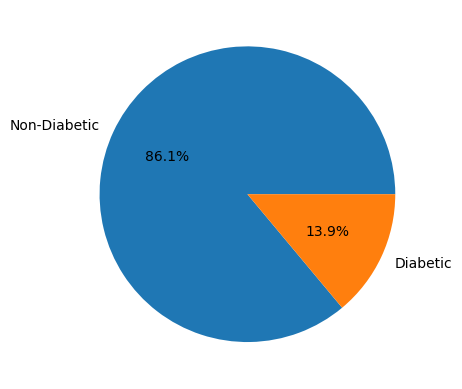

Diabetics Count:  35346
Non-Diabetics Count:  218334


In [27]:
# Data analysis and preprocessind techniques
# 1. Exploratory Data Analysis (EDA)
# 2. Dimensionality Reduction
# 3. Data Mining
# 4. Data Visualization 

############################################ EDA ############################################
# Types of EDA

# For single variable => taking one variable at a time
# 1. Univariate non-graphical.
# 2. Univariate graphical.

# For multiple variables => taking more than one variable at a time
# 3. Multivariate nongraphical.
# 4. Multivariate graphical.

#############################################################################################

# statistics summary of the dataset
# describe the dataset
# print the summary statistics of the dataset (mean, std, min, 25%, 50%, 75%, max)

print(dataset.describe())
# ANALYSIS #
# From the summary statistics we can see that:
# 1. Most of the rows are classified as non-diabetic (mean is closer to 0) => dataset may not be balanced
# 2 HighBP and HighChol have a mean close to 0.5, which can mean that they are not a very good indicator of diabetes since there are almost equal number of people with and without high blood pressure and high cholesterol but the classification is not balanced
# 3. The CholCheck has a mean very close to 1 and a small std => most people have had a cholesterol check within the last 5 years
# 4. BMI mean indicates a slightly overweight population    
# 4. Somekrs have a mean close to 0.5 => almost equal number of smokers and non-smokers
# 5. Stroke and HeartDiseaseorAttack have a mean close to 0 => most people have not had a stroke or heart disease/attack (but the two could be related) and the mean is close to the diabetes classification mean
# 6. High mean for PhysActivity and high std
# 8. Most people have any kind of health care coverage => good indicator of no diabetes 
# 9. Very little prople cannot afford to see a doctor
# 10. Mean of GenHlth is close to 2.5 => which is in the middle of the scale (good/very good)
# 11. Very low number of days mean for MentHlth and PhysHlth => most people have good mental and physical health (but the std is relitaively high)
# 12. Most people do not have difficulty walking or climbing stairs
# 13. Dataset is balanced in terms of gender
# 14. Age:
# 15. Most people have a high level of education (mean is high with low std) 5 => College 1 year to 3 years STD: 4 => High school graduate 6 => College graduate 
# 16. Income mean = 6 => Less than $50,000 ($35,000 to less than $50,000) (low std most people have similar (on the higher side) income)
# 17. Age lies on the older side (mean is 8 => 55-59 years) with a high-ish std => most people are older 

#############################################################################################

# Univariate EDA

# Draw a pie chart to show the distribution of the labels
print("Data Distribution: ")
plt.pie(np.array(labels.value_counts()), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%')
plt.show()
print("Diabetics Count: ", labels.value_counts()[1])
print("Non-Diabetics Count: ", labels.value_counts()[0])
# ANALYSIS #
# The dataset is not balanced, there are more non-diabetic people than diabetic people


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >, <Axes: >,


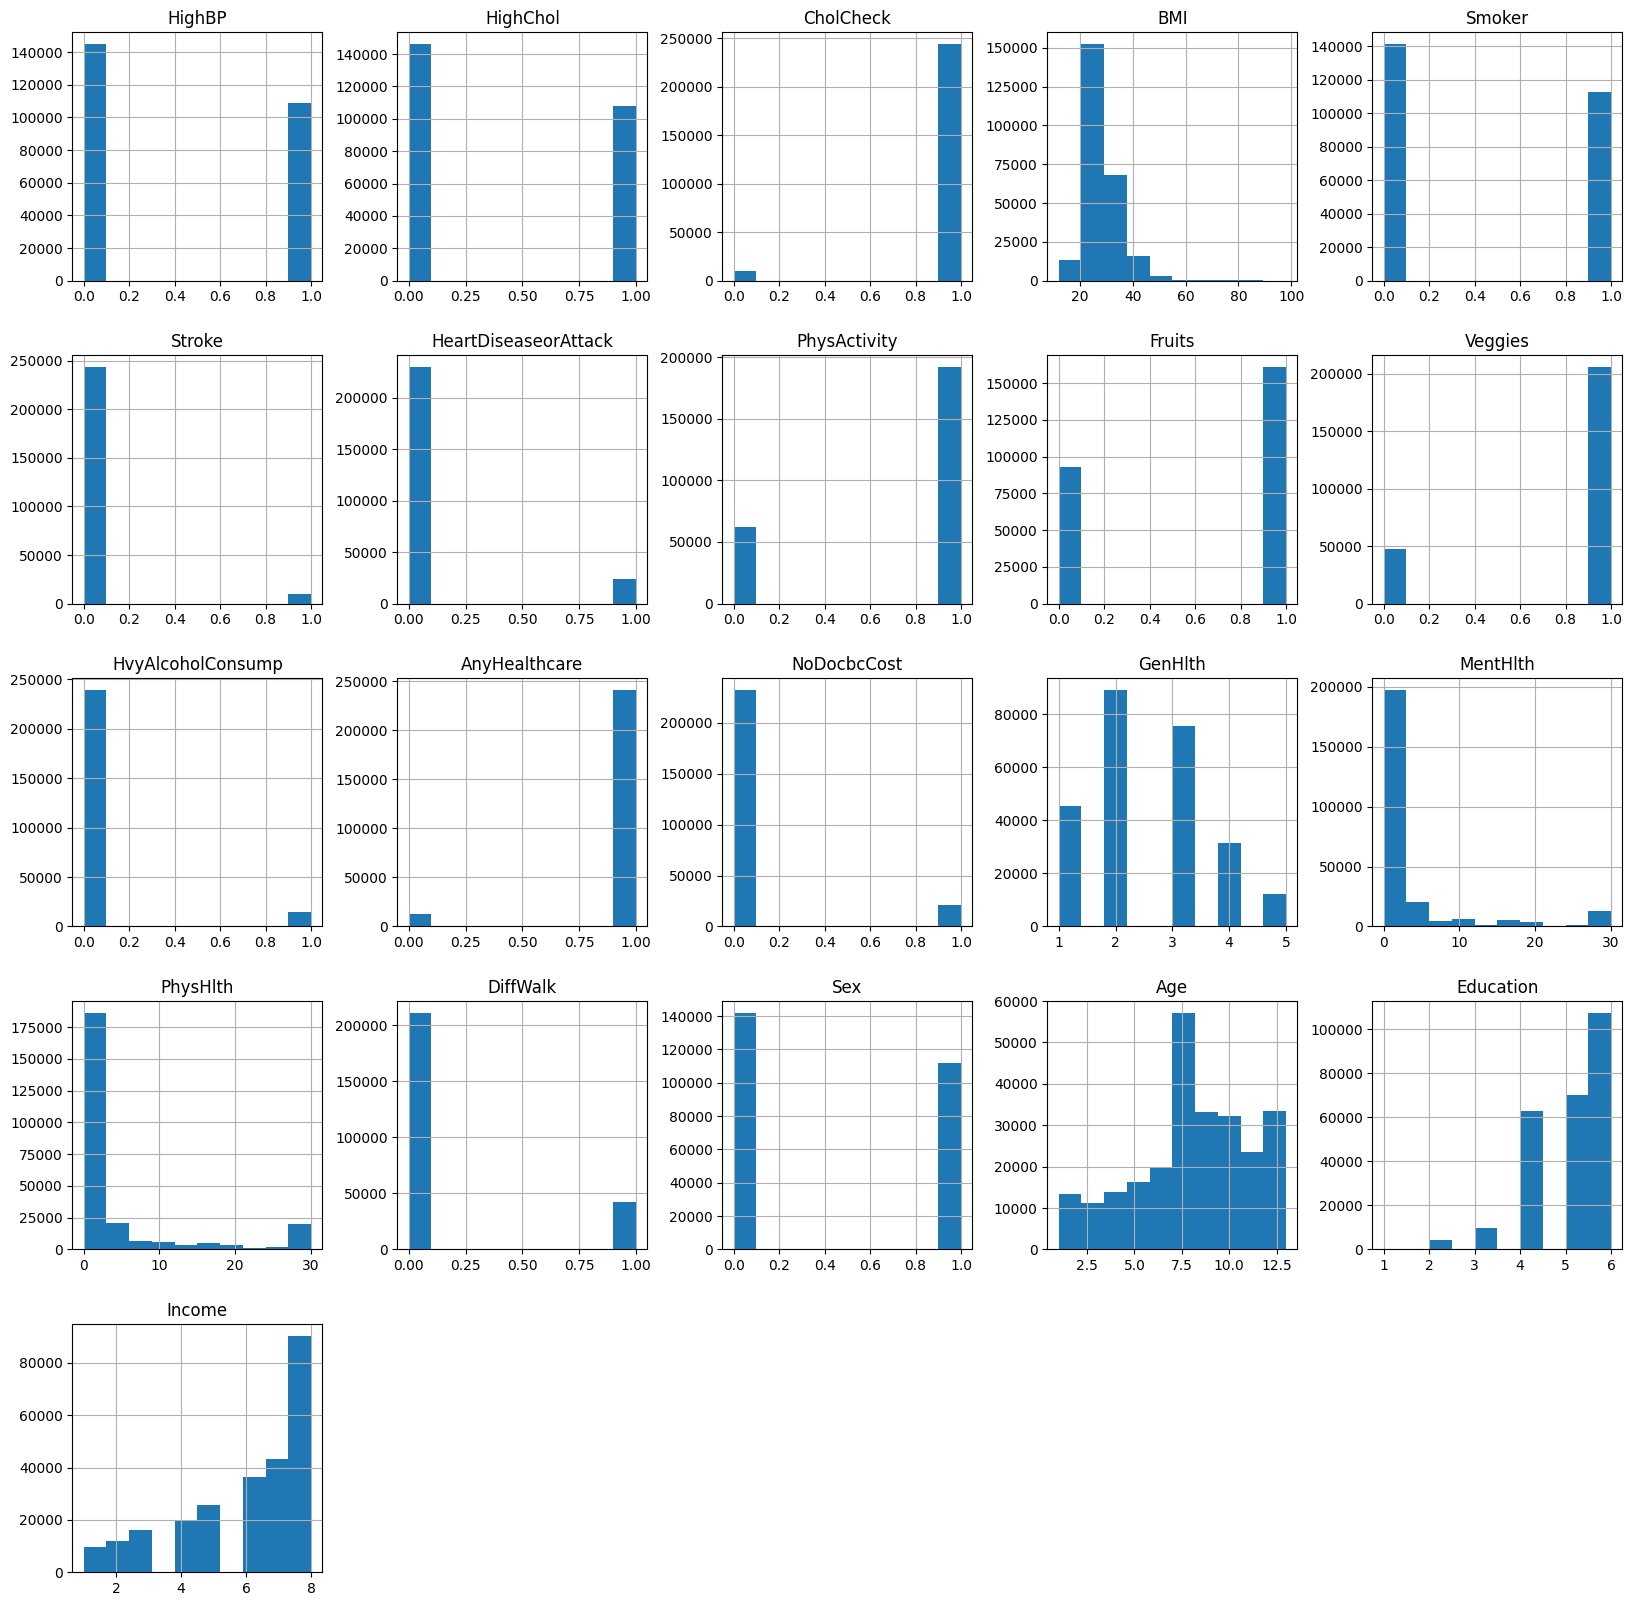

In [26]:
# Draw the histograms of each feature in the dataset to better understand the distribution of the data
# Since most of the data is binary we only need the count of each value
features.hist(figsize=(20, 20)) 
sns.countplot(x='HighBP', data=dataset)

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

In [ ]:
# Machine Learning Method 1: 

In [ ]:
# Machine Learning Method 2: 

In [ ]:
# Machine Learning Method 3: 